<a href="https://colab.research.google.com/github/barbaramit/Airbnb_Data_Analysis_SF/blob/main/Analisando_os_Dados_Airbnb_SF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb : *San Francisco - California*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de San Francisco na California, e ver quais insights podem ser extraídos a partir de dados brutos.**

San Francisco é uma das principais cidades dos Estados Unidos, tanto no âmbito turístico quanto no econômico. A metrópole é a quarta maior cidade do estado da Califórnia em termos de população, mas se destaca por sua pluralidade e tecnologia. 

San Francisco possui várias atrações turísticas mundialmente conhecidas, como a ponte Golden Gate, a antiga prisão de Alcatraz, a famosa prisão federal onde ficou Al Capone, o cais dos pescadores, o Presídio, Chinatown, Lombard Street, a rua em ziguezague repleta de jardins de flores, e é a maior metrópole ao lado do Vale do Silício. Empresas como Airbnb, Uber, Pinterest, Udemy, Twitter, Lucas Film, Salesforce, Zendesk, Slack, Dropbox, entre tantas outras possuem sua sede na região.

Tive a oportunidade de estudar durante um mês em San Francisco, o que despertou a minha curiosidade para saber quais informações poderia adquirir realizando a análise dos Dados do Airbnb.

Algumas informações que iremos extrair desta análise:


*   O tipo de propriedade mais alugada em SF no Airbnb
*   Os bairros mais caros e mais baratos da cidade
*   Mínimo de noites exigidas

Convido você a me acompanhar nesta análise para conhecer algumas informações à respeito dos imóveis e entre outros insights.


---

> Golden Gate Bridge - Foto tirada por mim em junho de 2018.










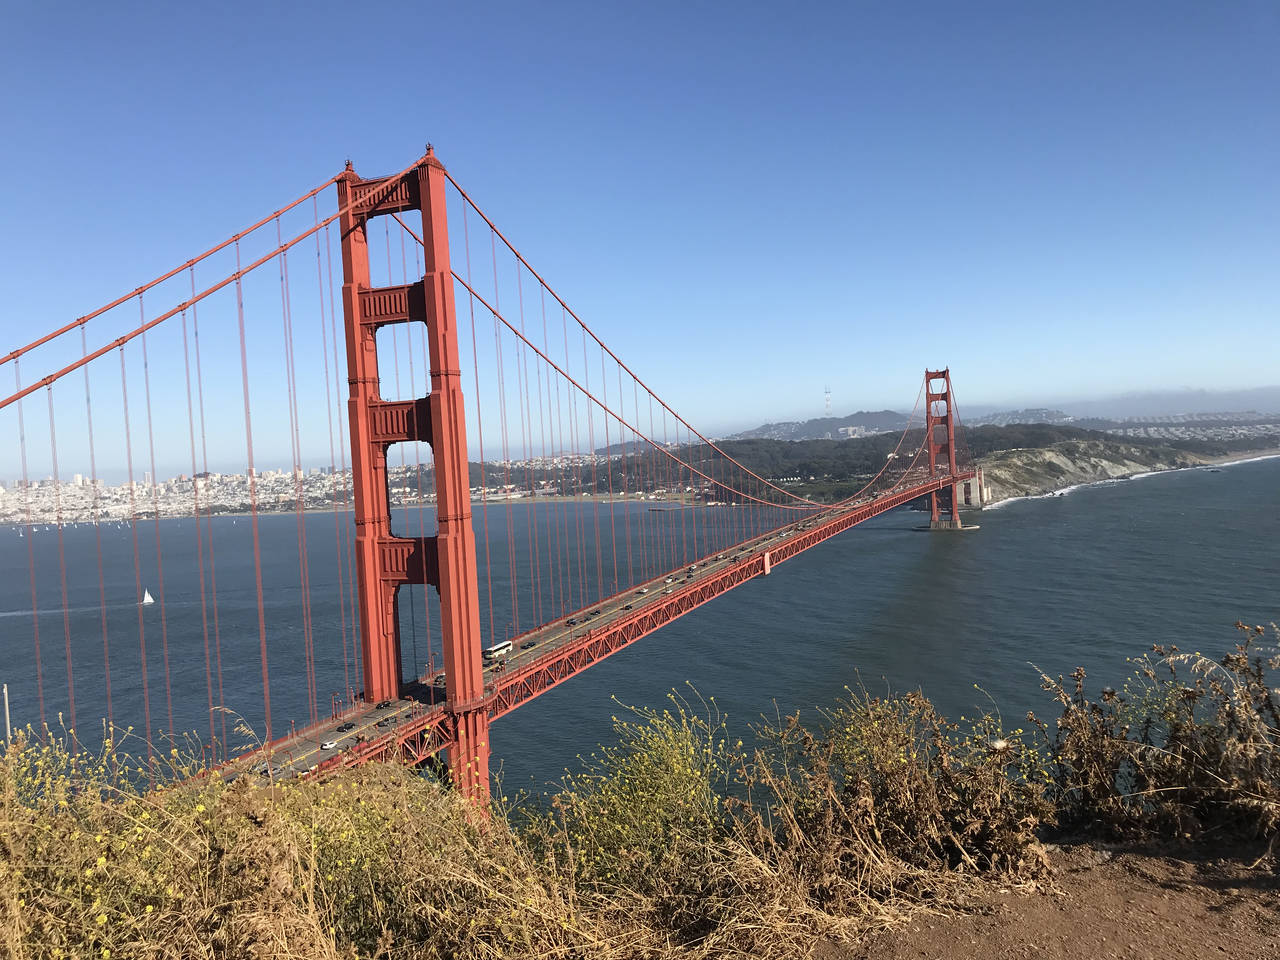



---



## Obtenção dos Dados
Para esta análise exploratória inicial, todos os dados utilizados foram obtidos a partir do Inside Airbnb. Detalhe que esta é a versão resumida do dataset (listings.csv), disponibilizada pelo próprio portal.

In [ ]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2021-10-06/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados. Além disso, é interessante criar um dicionário das variáveis presentes no dataset para eventual consulta, além de ser uma maneira de ajudar quem está lendo o notebook e não tem muito conhecimento sobre os dados apresentados.        

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - quantidade de reviews nos últimos 12 meses
* `license` - Short-Term Residential Rental Certificate. Em San Francisco, quem aluga o imóvel por períodos curtos deve se registrar para obter uma licença que permite o aluguel na plataforma. Mais informações [aqui](https://www.airbnb.com.br/help/article/871/san-francisco-calif%C3%B3rnia-eua?_set_bev_on_new_domain=1634081574_NGExZTVkMjMzOGYw).


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,160,2,302,2021-09-17,3.54,1,104,40,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2015-08-28,0.77,1,365,0,NaN
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.17,9,365,0,NaN
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2017-08-12,0.10,9,346,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,895,7,28,2019-06-28,0.19,2,365,0,STR-0000264


Logo nessa primeira análise já podemos perceber uma predominância de valores ausentes (NaN) na coluna `neighbourhood`. Porém, para chegar em uma conclusão precisamos de uma análise mais analitica.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Em seguida, vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.dtypes

Entradas:	 6566
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [ ]:
#transformando tipo object em DateTime
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y-%m-%d")
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante analisar se esses valores nulos são significativos comparados ao total de entradas.


A biblioteca `missingo` é uma ótima maneira de verificar visualmente se há valores ausentes no seu dataset, sendo sua presença indicada pela quantidade de linhas brancas.

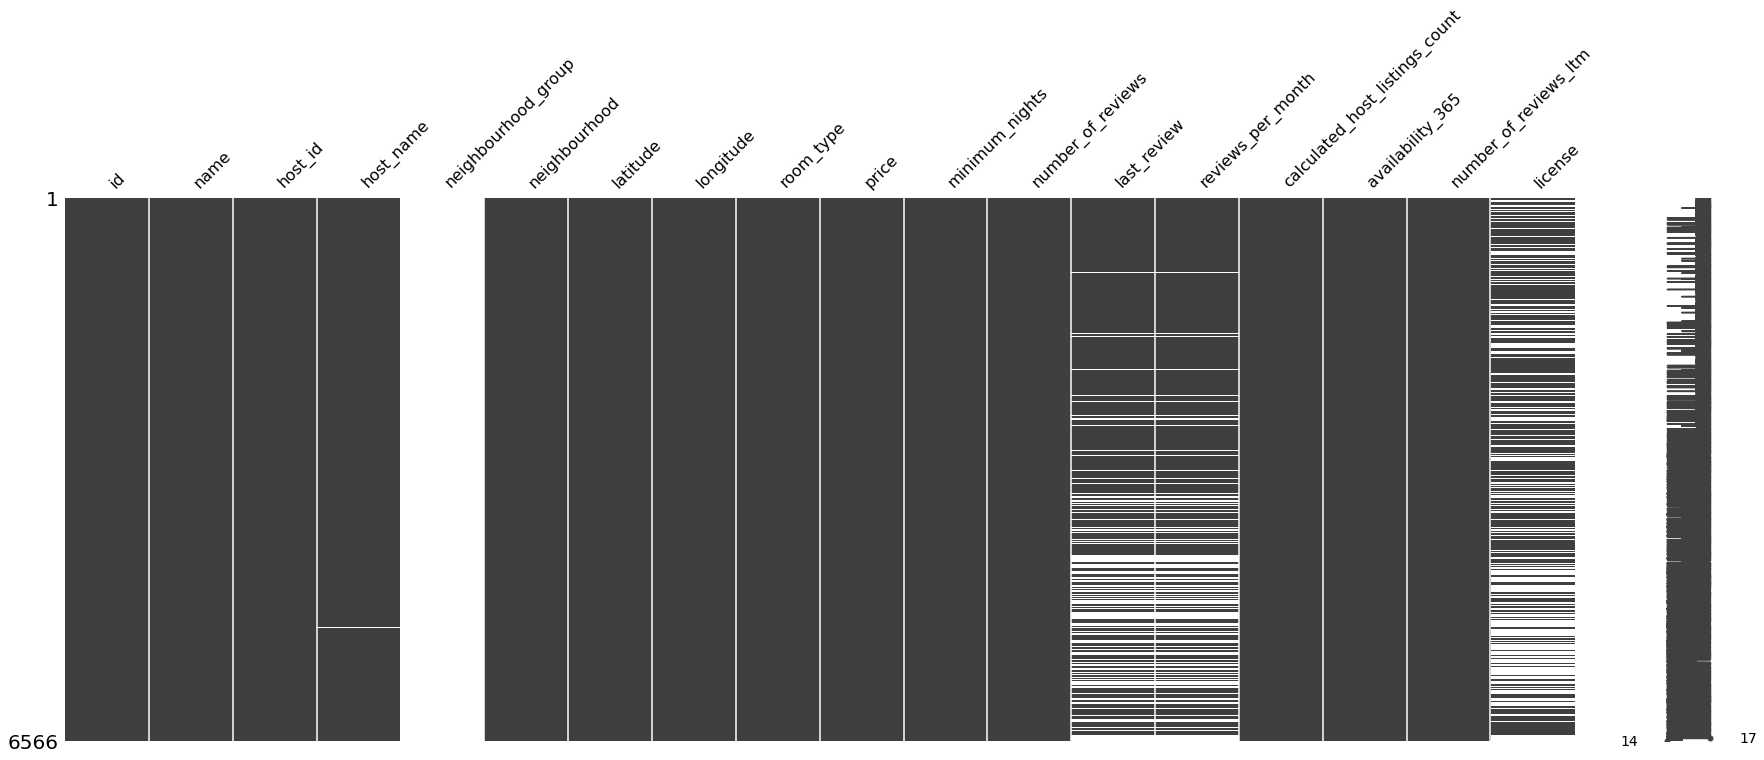

In [ ]:
missingno.matrix(df, figsize=(30,10));

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print(df.isnull().sum().sort_values(ascending=False)) # quant


neighbourhood_group               6566
license                           2736
reviews_per_month                 1397
last_review                       1397
host_name                           14
longitude                            0
name                                 0
host_id                              0
neighbourhood                        0
latitude                             0
room_type                            0
number_of_reviews_ltm                0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
id                                   0
dtype: int64


In [ ]:
print(((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)) # porcentagem


neighbourhood_group               100.000000
license                            41.669205
reviews_per_month                  21.276272
last_review                        21.276272
host_name                           0.213220
longitude                           0.000000
name                                0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64


* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* Já a coluna `license` possui 41,67% de valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 21% das linhas.
* A variável `host_name` têm aproximadamente 0,2% dos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar e visualizar a distribuição das variáveis, irei plotar o histograma das variáveis numéricas do dataset.

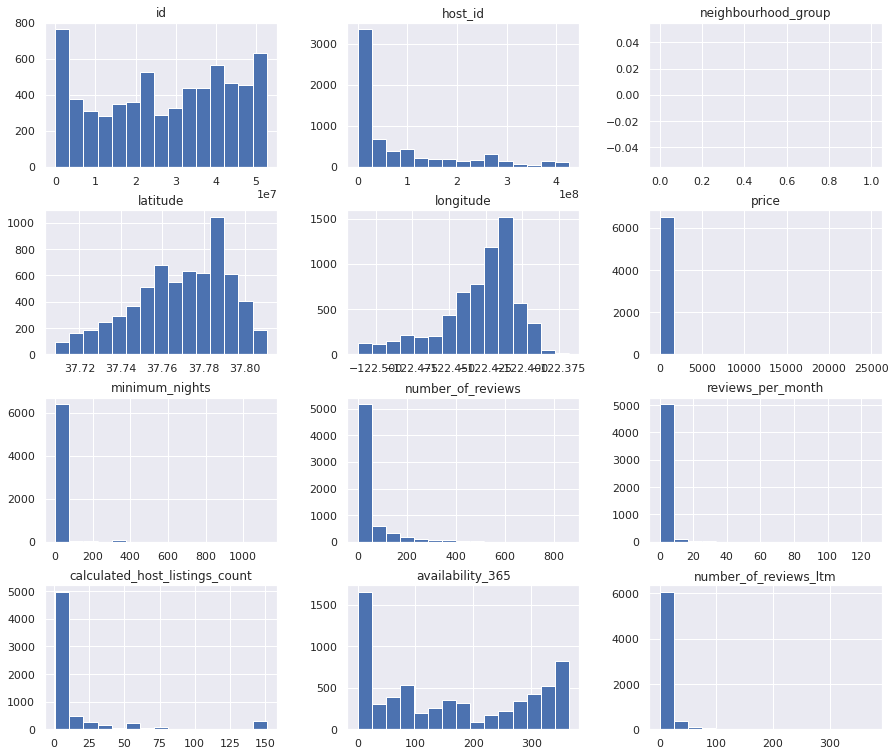

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,13));
sns.set()

Após analisar as distribuições, nota-se que há indícios da presença de outliers e que grande parte das distribuições é do tipo assimétrica à direita (moda < mediana < média). Como por exemplo: a quantidade de noites mínimas na propriedade ser mais de 1000 ou o preço de um aluguel ser 25.000 doláres. 


### **Q4. Há *outliers* presentes?**

Para detectar se há outliers presentes, temos duas maneiras rápidas:

Resumo estatístico com o comando describe()

1.   Resumo estatístico com o metódo `describe()`
2.   Plotar boxplots para cada variável

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6566.000000,6566.000000,6566.000000,5169.000000,6566.000000,6566.000000,6566.000000
mean,234.903442,23.265915,44.223728,1.943993,15.095340,160.651386,6.139507
std,687.402372,49.322591,84.366062,5.202748,32.597783,134.109349,15.267457
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,95.000000,2.000000,1.000000,0.220000,1.000000,22.000000,0.000000
50%,150.000000,30.000000,7.000000,0.690000,2.000000,142.000000,1.000000
75%,240.000000,30.000000,46.000000,2.100000,10.000000,300.000000,4.000000
max,25000.000000,1125.000000,861.000000,126.000000,151.000000,365.000000,373.000000


De acordo com o resultado estatístico acima, podemos confirmar algumas hipóteses:

* A variável `price` possui 75% dos preços do aluguél abaixo de 240 doláres, mas seu valor máximo é de $25000.

* Na variável `price` temos o valor mínimo sendo $0, o que certamente não é possível.
* A variável `minimum_nights` possuí 75% dos valores sendo 30 noites, porém o valor máximo é de 1.125 noites (aproximadamente 3 anos e 1 mês).

Utilizando da mesma linha pensamento, é possível enxergar outliers nas outras colunas, pois todos os valores referentes a "75%" são bem menores que o valor máximo de cada variável (exceto em `availability_365`).

#### Boxplot para minimum_nights


minimum_nights: valores acima de 30:
365 entradas
5.5589%


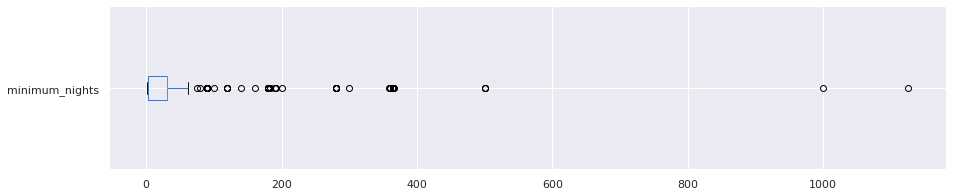

In [ ]:
df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3));

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas" .format(len(df[df.minimum_nights > 30])))
print("{:.4f}%" .format((len(df[df.minimum_nights > 30])/ df.shape[0])*100))

#### Boxplot para price


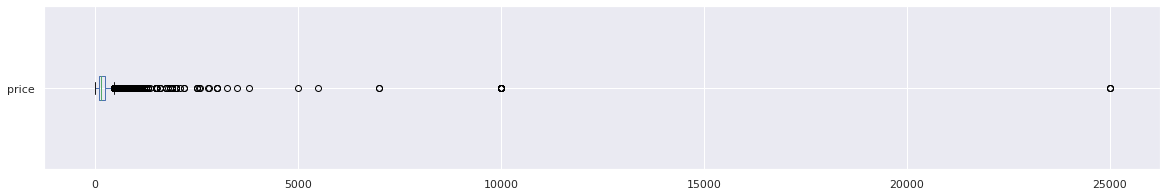

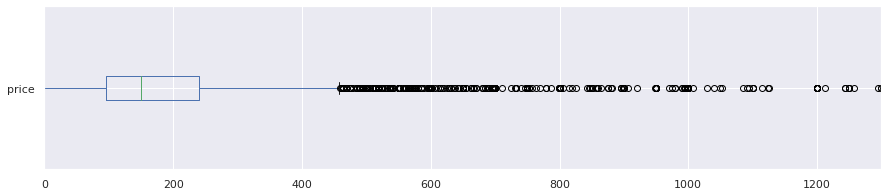


price: valores acima de $500
385 entradas
5.8635%


In [ ]:
# price
df.price.plot(kind="box", vert=False, figsize=(20,3))
plt.show()

df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3))
plt.show()

# ver quantidade de valores acima de $500 para price
print("\nprice: valores acima de $500")
print("{} entradas" .format(len(df[df.price > 500])))
print("{:.4f}%" .format((len(df[df.price > 500])/ df.shape[0])*100))

#### Boxplot para reviews_per_month, number_of_reviews e number_of_reviews_ltm

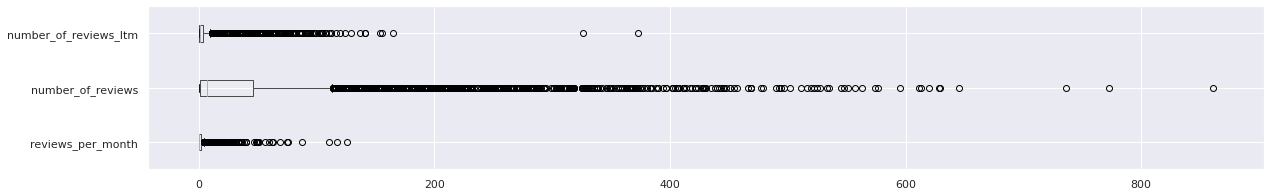

In [ ]:
x= df.boxplot (["reviews_per_month", "number_of_reviews", "number_of_reviews_ltm"], vert=False, figsize=(20,3));

#### Limpando os dados
Para tratar estes dados, podemos utilizar o método IQR para definição de limites inferiores e superiores.

**Método IQR**

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior.
* Remover os outliers.

In [ ]:
# definindo valores q1 e q3 para price
q1 = df.price.quantile(.25)
q3 = df.price.quantile(.75)

# calculando o IQR
IQR = q3 - q1

# calculando o limite inferior e o superior
sup_price = q3 + 1.5 * IQR
inf_price = q1 - 1.5 * IQR

print("Limite superior da variável price é: ", sup_price)
print("Limite inferior da variável price é: ", inf_price)
print("Porcentagem de dados acima do limite superior: ", ((len(df[df.price > sup_price]) / df.shape[0]) *100))
print("Quantidade de dados abaixo do limite inferior: ", len(df[df.price < inf_price]))

Limite superior da variável price é:  457.5
Limite inferior da variável price é:  -122.5
Porcentagem de dados acima do limite superior:  7.188547060615291
Quantidade de dados abaixo do limite inferior:  0


In [ ]:
# definindo valores q1 e q3 para minimum nights
q1_minights = df.minimum_nights.quantile(.25)
q3_minights = df.minimum_nights.quantile(.75)

# calculando o IQR
IQR_minights = q3_minights - q1_minights

# calculando o limite inferior e o superior
sup_minights = q3_minights + 1.5 * IQR_minights
inf_minights = q1_minights - 1.5 * IQR_minights

print("Limite superior da variável minimum nights é: ", sup_minights)
print("Limite inferior da variável minimum nights é: ", inf_minights)
print("Porcentagem de dados acima do limite superior: ", ((len(df[df.minimum_nights > sup_minights]) / df.shape[0]) *100))
print("Quantidade de dados abaixo do limite inferior: ", len(df[df.minimum_nights < inf_minights]))


Limite superior da variável minimum nights é:  72.0
Limite inferior da variável minimum nights é:  -40.0
Porcentagem de dados acima do limite superior:  2.695705147730734
Quantidade de dados abaixo do limite inferior:  0


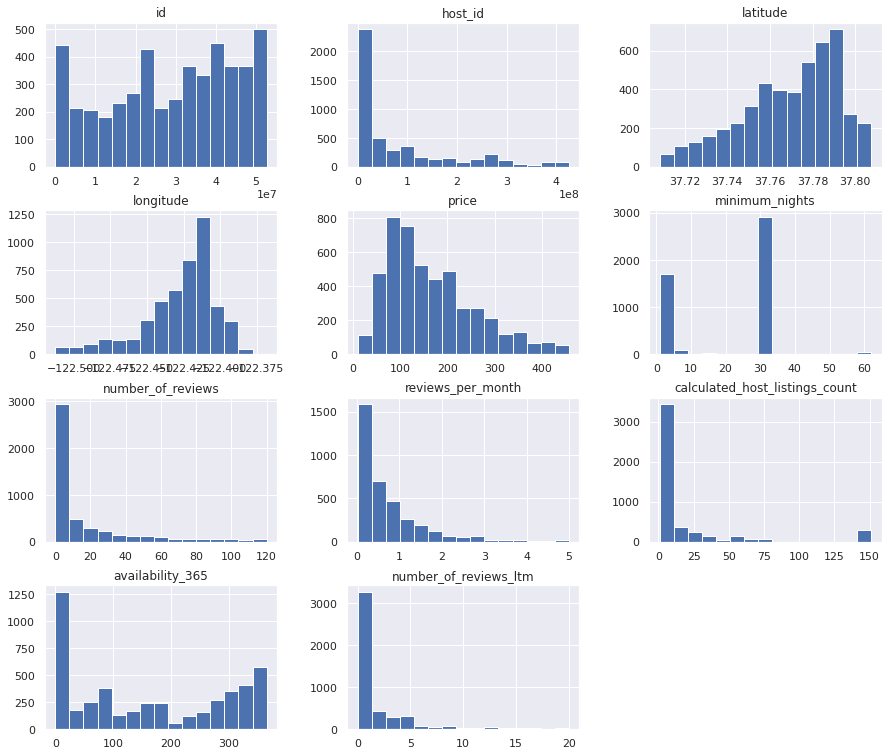

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()

# removendo dados acima do limite superior e iguais a 0 - variável price
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

# removendo dados acima do limite superior - variável minimum_nights
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minights].index, axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis= 1, inplace=True)

df_clean.drop(df_clean[df_clean.number_of_reviews > 120].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 20].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 5].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas após a limpeza
df_clean.hist(bins=15, figsize=(15,13));
sns.set()

A priori, só limpamos algumas variáveis, pois as outras não serão utilizadas nas próximas análises. Ainda assim, é possível enxergar a diferença entre os primeiros histogramas para estes novos e visualizar melhor a distribuição das variáveis.

####Comparações
Vamos comparar a média de preços e noites mínimas antes e depois da limpeza de dados.

In [ ]:
print("A média de preços em San Francisco antes da limpeza de dados: $", df.price.mean())
print("A média de preços em San Francisco depois da limpeza de dados: $", df_clean.price.mean())

A média de preços em San Francisco antes da limpeza de dados: $ 234.90344197380443
A média de preços em San Francisco depois da limpeza de dados: $ 165.44017449106772


In [ ]:
print("A média de noites mínimas em San Francisco antes da limpeza de dados:", df.minimum_nights.mean())
print("A média de noites mínimas em San Francisco depois da limpeza de dados:", df_clean.minimum_nights.mean())

A média de noites mínimas em San Francisco antes da limpeza de dados: 23.26591532135242
A média de noites mínimas em San Francisco depois da limpeza de dados: 19.93560448691317


A média de preços é $165.44 e a média de noites mínimas é, aproximando, 20 noites.

Portanto, a limpeza de dados nos ajudou a ter uma noção melhor de valores que estão sendo realmente cobrados nas propriedades em SF e da quantidade de noites mínimas exigidas.

###**Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis. 

Pprimeiramente, para identificar as correlações irei criar uma matriz de correlação. Em seguida, utilizando a biblioteca `seaborn` irei plotar um gráfico *heatmap* a partir da matriz obtida.

In [ ]:
# matriz de correlação
corr =  df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr() 
    
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.271711,0.024434,0.009092,0.014189,-0.050177,0.073136
minimum_nights,-0.271711,1.000000,-0.253431,-0.304213,0.044931,0.264861,-0.275662
number_of_reviews,0.024434,-0.253431,1.000000,0.478801,-0.176014,-0.080668,0.360559
reviews_per_month,0.009092,-0.304213,0.478801,1.000000,-0.165815,-0.089991,0.540674
calculated_host_listings_count,0.014189,0.044931,-0.176014,-0.165815,1.000000,0.041400,-0.180895
availability_365,-0.050177,0.264861,-0.080668,-0.089991,0.041400,1.000000,-0.052908
number_of_reviews_ltm,0.073136,-0.275662,0.360559,0.540674,-0.180895,-0.052908,1.000000


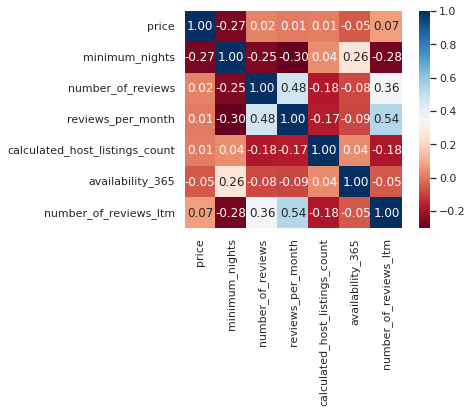

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

O gráfico Heatmap permite a visualização das correlações positivas e negativas. Valores mais próximos de 1 (azuis) são variavéis com correlações positivas, e variáveis com valores negativos (vermelhas) possuem uma correlação negativa.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.
Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts())


Entire home/apt    3063
Private room       1598
Shared room         100
Hotel room           53
Name: room_type, dtype: int64


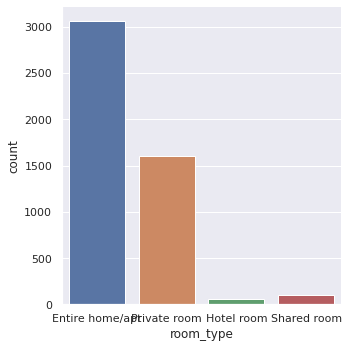

In [ ]:
sns.catplot('room_type', data=df_clean, kind="count");

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print((df_clean.room_type.value_counts() / df_clean.shape[0]) *100)


Entire home/apt    63.626921
Private room       33.194848
Shared room         2.077275
Hotel room          1.100956
Name: room_type, dtype: float64


É possível observar que a maioria das pessoas optam por alugar uma casa ou apartamento inteiro, pois 63,6% dos imóveis do conjunto de dados são deste tipo. Em seguida, o tipo de imóvel mais alugado é o quarto privado com 33,2%.

Podemos analisar a média de preços para cada imóvel e em função do número de noites mínimas utilizando o método `groupby` que nos permite realizar diferentes tipos de análises.

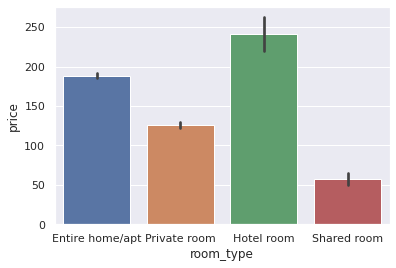

In [ ]:
sns.barplot(x=df_clean.room_type, y=df_clean.price);

#### Entire home/apt

Preço médio Entire home/apt = $188.30 


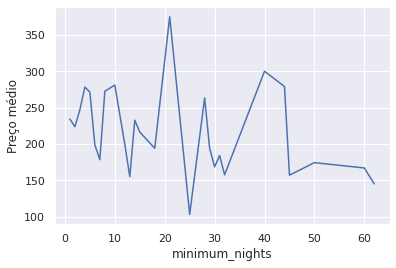

In [ ]:
# média de preços de propriedades Entire home/apt
print("Preço médio Entire home/apt = ${:.2f} " .format(df_clean.loc[(df_clean['room_type'] == "Entire home/apt")].price.mean()))

# média de preços de propriedades Entire home/apt em função do número de noites mínimas
df_clean[(df_clean['room_type'] == "Entire home/apt")].groupby(["minimum_nights"])["price"].mean().plot();
plt.ylabel('Preço médio')
plt.show()

#### Private room

Preço médio Private room = $125.92 


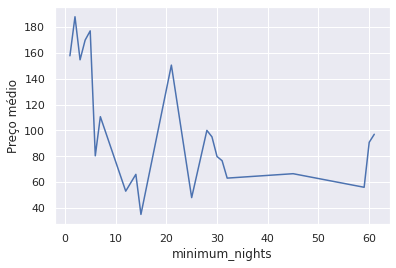

In [ ]:
# média de preços de propriedades Private room
print("Preço médio Private room = ${:.2f} " .format(df_clean.loc[(df_clean['room_type'] == "Private room")].price.mean()))

# média de preços de propriedades Private room em função do número de noites mínimas
df_clean[(df_clean['room_type'] == "Private room")].groupby(["minimum_nights"])["price"].mean().plot();
plt.ylabel('Preço médio')
plt.show()

#### Shared room

Preço médio Shared room = $56.91 


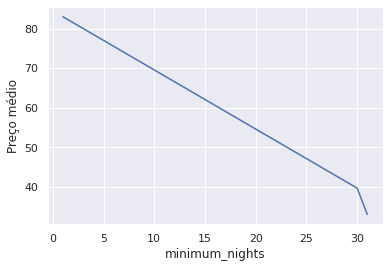

In [ ]:
# média de preços de propriedades Shared room
print("Preço médio Shared room = ${:.2f} " .format(df_clean.loc[(df_clean['room_type'] == "Shared room")].price.mean()))

# média de preços de propriedades Shared room em função do número de noites mínimas
df_clean[(df_clean['room_type'] == "Shared room")].groupby(["minimum_nights"])["price"].mean().plot();
plt.ylabel('Preço médio')
plt.show()

#### Hotel room

Preço médio Hotel room = $240.83 


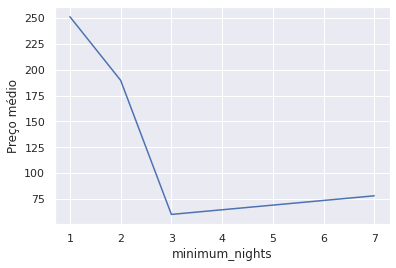

In [ ]:
# média de preços de propriedades Hotel room
print("Preço médio Hotel room = ${:.2f} " .format(df_clean.loc[(df_clean['room_type'] == "Hotel room")].price.mean()))

# média de preços de propriedades Hotel room em função do número de noites mínimas
df_clean[(df_clean['room_type'] == "Hotel room")].groupby(["minimum_nights"])["price"].mean().plot();
plt.ylabel('Preço médio')
plt.show()

Também podemos explorar e gerar mais insights com os nossos dados:

In [ ]:
# quantidade de imóveis de acordo com o número de noites mínimas exigidas e do tipo de quarto
df_clean.groupby(["minimum_nights","room_type"])["id"].count()[:10]

minimum_nights  room_type      
1               Entire home/apt     74
                Hotel room          48
                Private room       458
                Shared room         40
2               Entire home/apt    303
                Hotel room           3
                Private room       251
3               Entire home/apt    263
                Hotel room           1
                Private room        77
Name: id, dtype: int64

In [ ]:
# preço médio de acordo com o número de noites mínimas exigidas e do tipo de quarto
df_clean.groupby(["minimum_nights","room_type"])["price"].mean()[:10]

minimum_nights  room_type      
1               Entire home/apt    234.162162
                Hotel room         251.187500
                Private room       157.698690
                Shared room         82.975000
2               Entire home/apt    223.745875
                Hotel room         189.666667
                Private room       187.920319
3               Entire home/apt    247.186312
                Hotel room          60.000000
                Private room       154.623377
Name: price, dtype: float64

### **Q7. Qual a localidade mais cara em San Francisco?**

Antes de viajar, é sempre útil saber quais as localidades mais caras e as mais baratas da cidade. Para extrair essa informação, usarei novamente o `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) e os respectivos preços de locação.




#### Bairros mais caros

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Twin Peaks             228.718750
Presidio               214.600000
Financial District     203.560000
Glen Park              201.513514
Marina                 201.475806
Castro/Upper Market    200.355330
Potrero Hill           196.867925
South of Market        190.939086
Chinatown              187.016260
Presidio Heights       184.882353
Name: price, dtype: float64

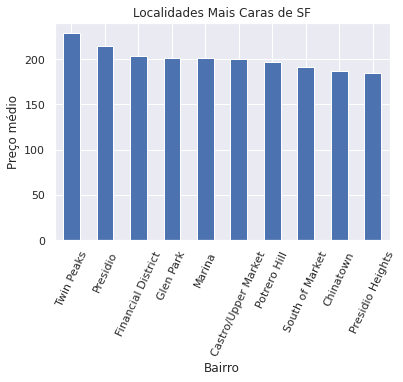

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title('Localidades Mais Caras de SF')
plt.xlabel('Bairro')
plt.ylabel('Preço médio')
plt.xticks(rotation=65)

plt.show()

Para entendermos um pouco melhor sobre os bairros, segue um mapa disponível no artigo "A Guide to the Neighborhoods of San Francisco" no site da [Kopa](https://www.kopa.co/blog/posts/a-guide-to-the-neighborhoods-of-san-francisco). 
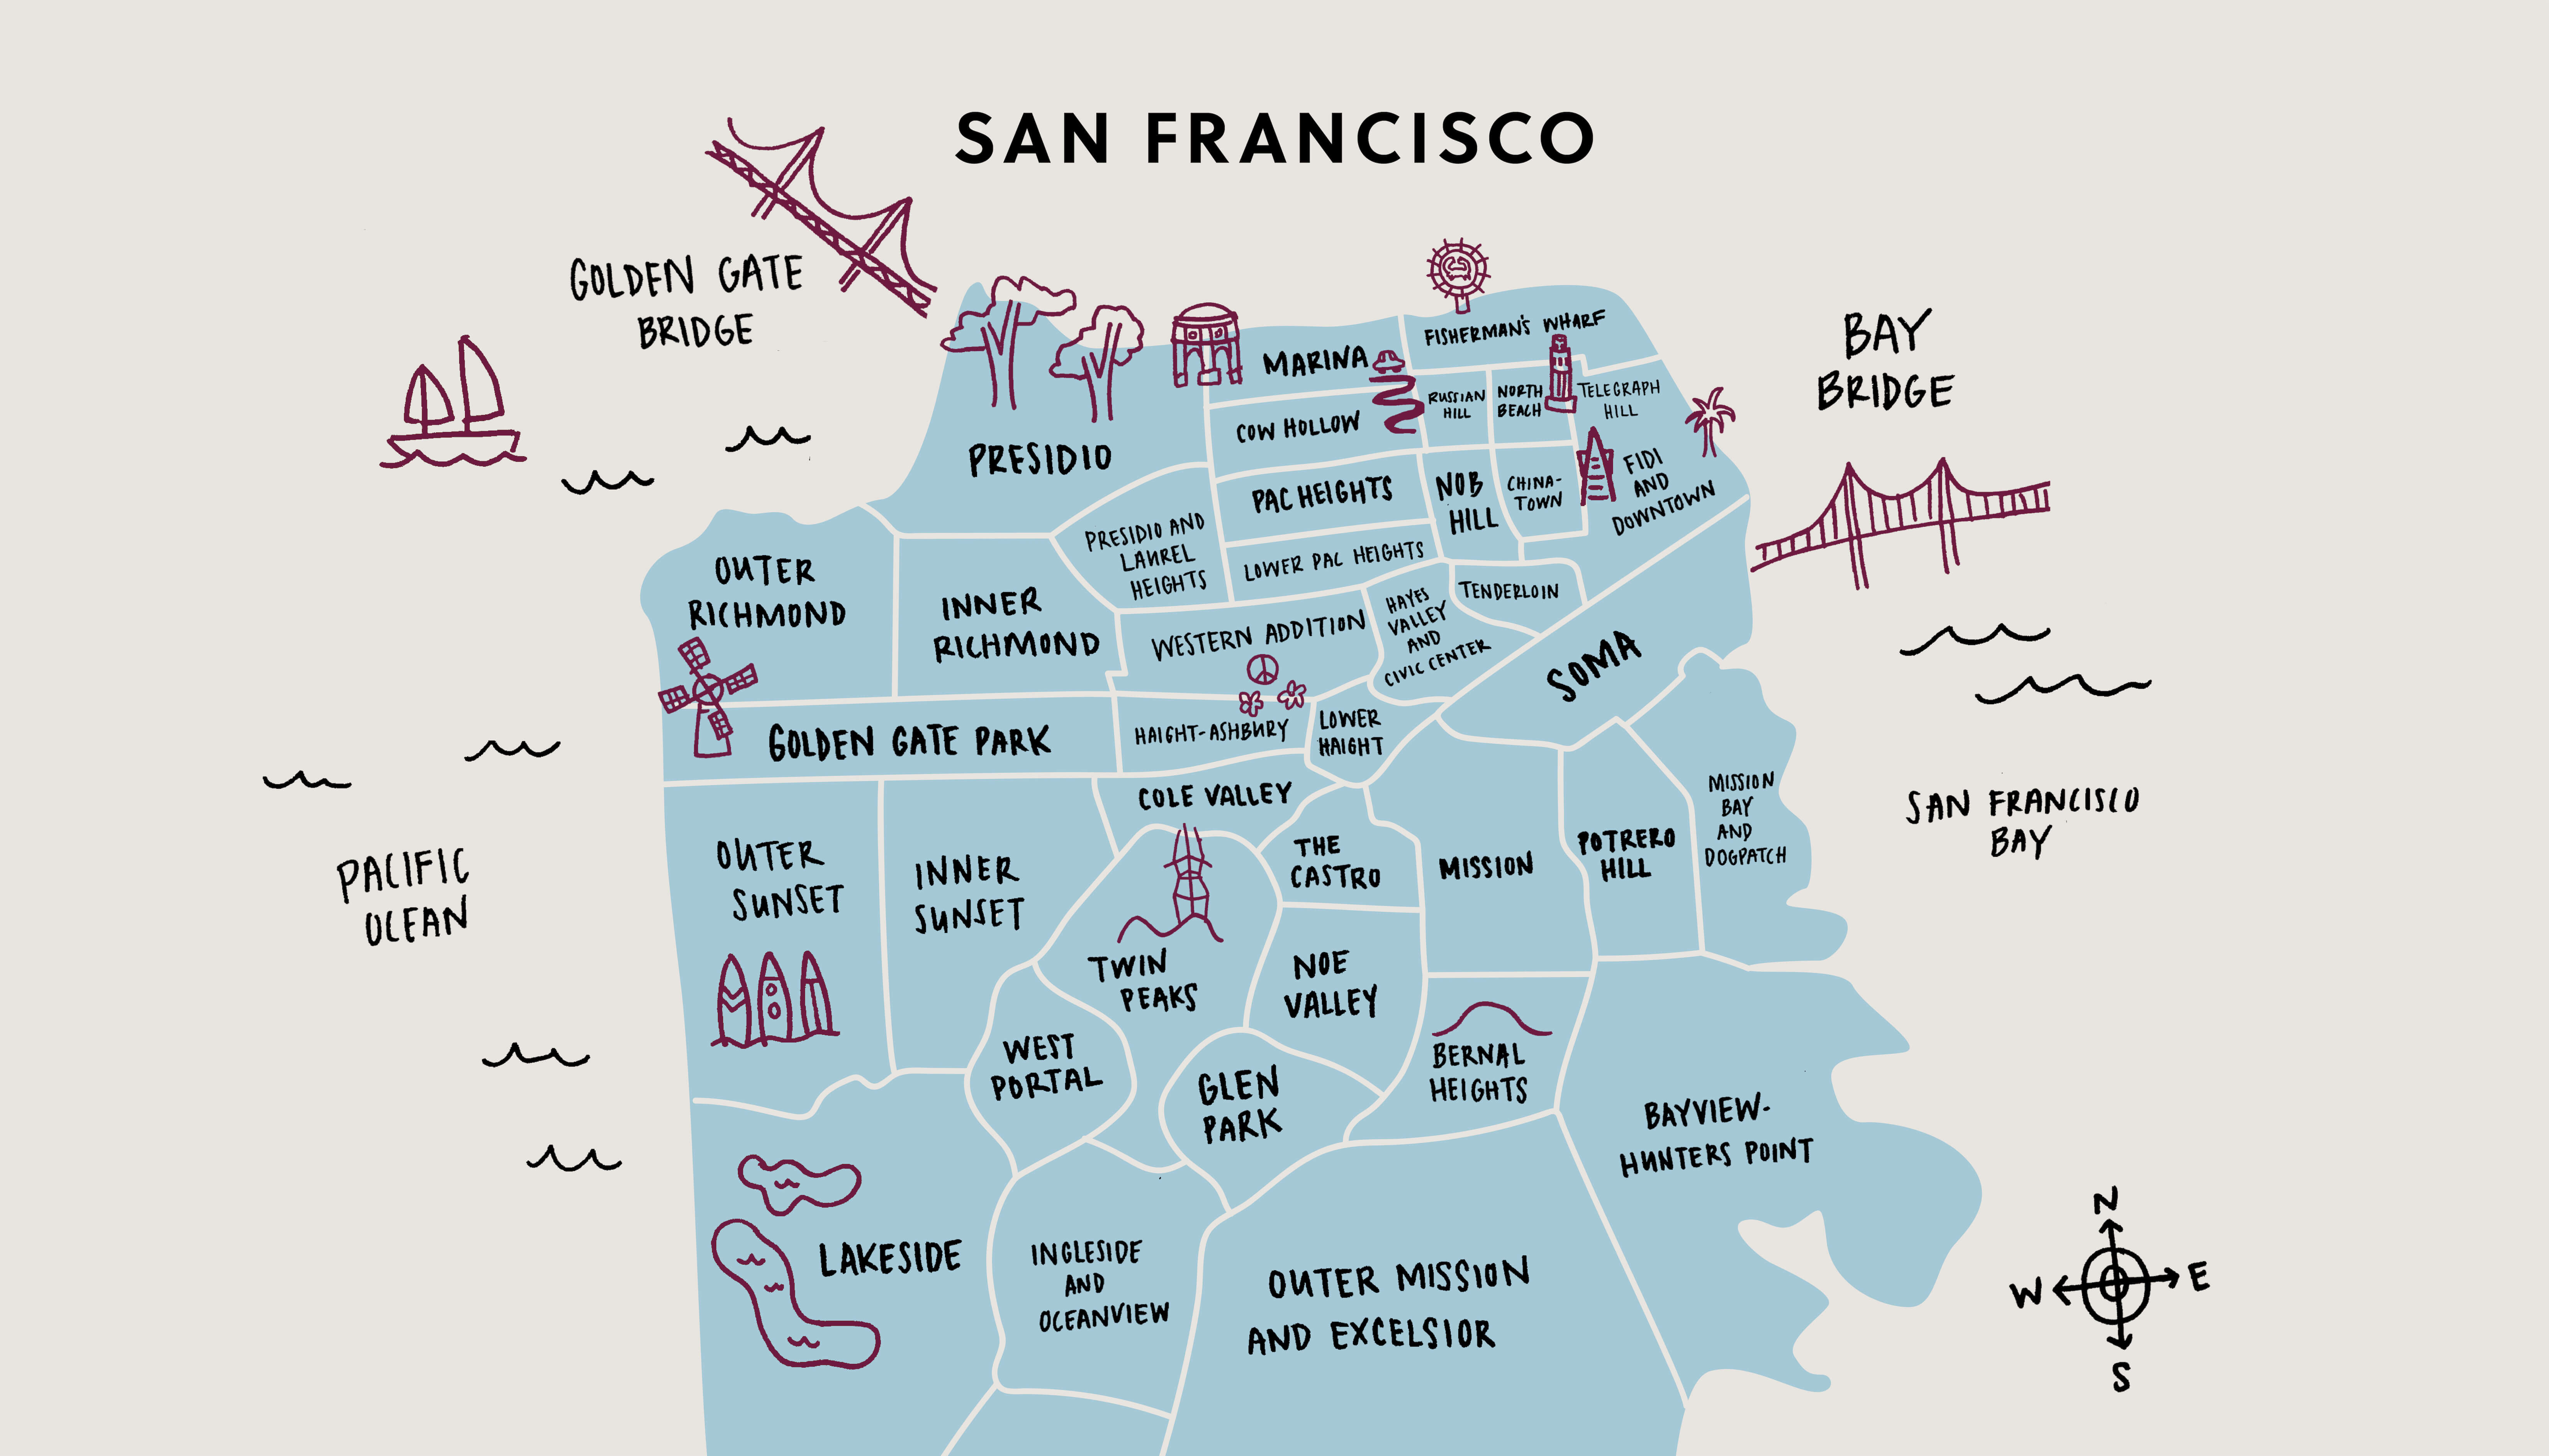

Alguns dos bairros mais caros de SF: Presídio, Marina, Potrero Hill, Pacific Heights e outros. Sendo que o primeiro da lista não costuma ter imóveis disponíveis para aluguel. Outros bairros, como Twin Peaks e Chinatown não são considerados "bairros nobres", mas possuem também imóveis com preços elevados. 

In [ ]:
# ver quantidade de imóveis
print("Quantidade de imóveis no bairro:")
print("Presidio = {}" .format(df_clean[df_clean.neighbourhood == "Presidio"].shape[0]))
print("Marina = {}" .format(df_clean[df_clean.neighbourhood == "Marina"].shape[0]))
print("Twin Peaks = {}" .format(df_clean[df_clean.neighbourhood == "Twin Peaks"].shape[0]))
print("Glen Park = {}" .format(df_clean[df_clean.neighbourhood == "Glen Park"].shape[0]))
print("Financial District = {}" .format(df_clean[df_clean.neighbourhood == "Financial District"].shape[0]))

Quantidade de imóveis no bairro:
Presidio = 5
Marina = 124
Twin Peaks = 32
Glen Park = 37
Financial District = 125


Percebe-se que o bairro mais caro do dataset, Twin Peaks, possui apenas 32 entradas/imóveis disponíveis. Por conseguinte, isso acaba elevando significativamente a média dos preços. Já o bairro Marina, que está em 5° lugar, possui 124 entradas o que normaliza mais a distribuição e a média dos valores.

In [ ]:
df_clean[df_clean.neighbourhood == "Twin Peaks"].head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
45,55636,"❤️ Super luxury Apt, Great View, 5 Star Reviews",262875,Paul & Debbie,Twin Peaks,37.74778,-122.44566,Entire home/apt,116,30,27,2019-04-21,0.22,2,309,0,NaN
97,148769,Ground Floor Studio with Garage Parking,709325,Mark,Twin Peaks,37.75045,-122.44956,Entire home/apt,70,30,92,2021-08-01,1.08,5,310,3,STR-0000672
640,2510224,BR+Balcony in Artistic Sanctuary :),12849180,Sahar,Twin Peaks,37.74682,-122.45398,Private room,80,30,23,2019-11-03,0.29,4,90,0,NaN


In [ ]:
df_clean[df_clean.neighbourhood == "Presidio"].head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
613,2314849,Garden studio in the Marina,11820504,John,Presidio,37.79802,-122.44742,Entire home/apt,125,30,12,2021-08-08,0.13,1,340,3,NaN
1196,7650309,Lake Street Apartment at Presidio Park,128158942,Diego,Presidio,37.78763,-122.47201,Entire home/apt,248,30,4,2020-03-07,0.20,1,264,0,City registration pending
2100,17778664,Gorgeous Zen Sanctuary in the Heart of the City,4123335,Heather,Presidio,37.78761,-122.46931,Entire home/apt,288,4,54,2021-09-19,1.30,1,0,9,STR-0002092


#### Bairros mais baratos

Para encontrar os bairros mais baratos, fazemos uma alteração no comando sort_values(), mudando o *ascending* de False para True.

* True = Ordem crescente (*default*)
* False = Ordem decrescente

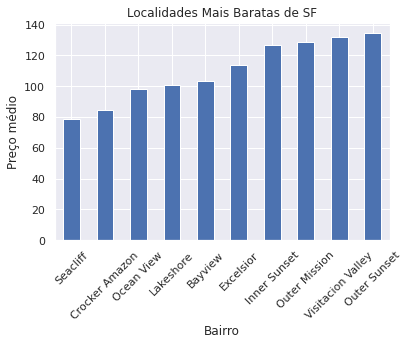

neighbourhood
Seacliff              78.571429
Crocker Amazon        84.869565
Ocean View            98.194805
Lakeshore            100.620690
Bayview              103.320896
Excelsior            113.511628
Inner Sunset         126.463918
Outer Mission        128.800000
Visitacion Valley    131.666667
Outer Sunset         134.358621
Name: price, dtype: float64


In [ ]:
# ver preços por bairros, na média 
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:10].plot(kind='bar')
plt.title('Localidades Mais Baratas de SF')
plt.xlabel('Bairro')
plt.ylabel('Preço médio')
plt.xticks(rotation=45)

plt.show()

print(df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:10])

In [ ]:
# ver quantidade de imóveis
print("Quantidade de imóveis no bairro:")
print("Crocker Amazon = {}" .format(df_clean[df_clean.neighbourhood == "Crocker Amazon"].shape[0]))
print("Seacliff = {}" .format(df_clean[df_clean.neighbourhood == "Seacliff"].shape[0]))
print("Ocean View = {}" .format(df_clean[df_clean.neighbourhood == "Ocean View"].shape[0]))

Quantidade de imóveis no bairro:
Crocker Amazon = 23
Seacliff = 7
Ocean View = 77


#### Os Bairros com mais imóveis disponíveis 

Também podemos analisar os bairros com os maiores números de ofertas e seus respectivos preços médios.

In [ ]:
# 10 bairros com os maiores números de ofertas
df_clean['neighbourhood'].value_counts()[:10]

Downtown/Civic Center    635
Mission                  438
South of Market          394
Western Addition         338
Nob Hill                 245
Haight Ashbury           229
Bernal Heights           212
Castro/Upper Market      197
Noe Valley               172
Outer Sunset             145
Name: neighbourhood, dtype: int64

In [ ]:
# a média de preços para os 5 bairros com maiores n° de ofertas
bairros = dict(df_clean['neighbourhood'].value_counts()[:5])
preçobairro = {}
for bairro in bairros:
    preço_medio = df_clean.loc[(df_clean['neighbourhood'] == bairro )].price.mean()
    preçobairro.update({bairro: preço_medio})
df_bairros = pd.Series(preçobairro)
df_bairros.sort_values(ascending=False)

South of Market          190.939086
Western Addition         163.514793
Nob Hill                 162.840816
Mission                  162.796804
Downtown/Civic Center    158.571654
dtype: float64

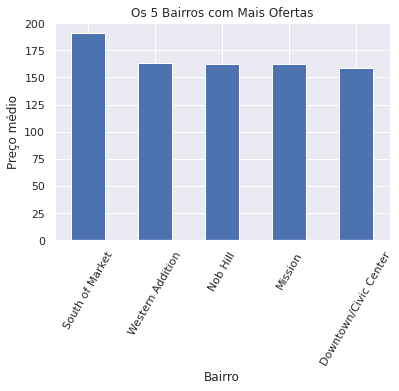

In [ ]:
df_bairros.sort_values(ascending=False).plot(kind='bar')
plt.title('Os 5 Bairros com Mais Ofertas')
plt.xlabel('Bairro')
plt.ylabel('Preço médio')
plt.xticks(rotation=60)

plt.show()

#### Mapa de Calor dos Preços dos Imóveis de San Francisco
Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, consideramos `x=longitude` e `y=latitude`.

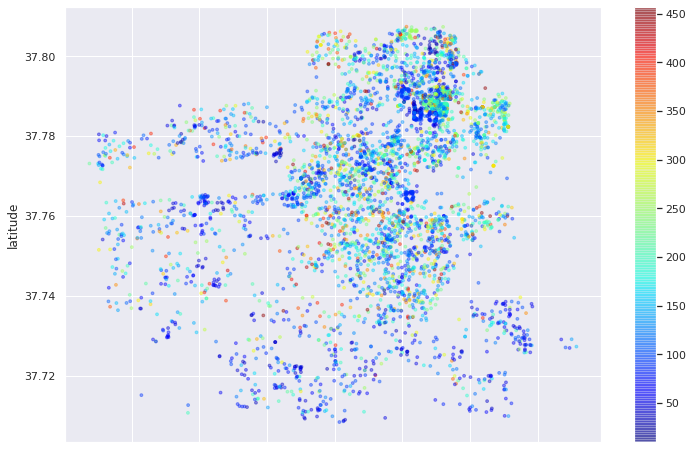

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### Analisando as variáveis `license`, `minimum_nights`, `room_type` e `number_of_reviews_ltm`.

Para finalizar, vamos explorar e analisar os dados presentes e ausentes da coluna `license` e relacioná-los com outras variáveis. 

Lembrando que: 

* `license` - Short-Term Residential Rental Certificate. Em San Francisco, quem aluga o imóvel por períodos curtos deve se registrar para obter uma licença que permite o aluguel na plataforma.

* `number_of_reviews_ltm` - quantidade de reviews nos últimos 12 meses


#### `df_clean['license'].isnull()`

In [ ]:
# quantidades de imóveis disponíveis que NÃO possuem licença de acordo com o tipo de imóvel
df_clean[(df_clean['license'].isnull())].groupby(["room_type"])["id"].count()

room_type
Entire home/apt    1845
Hotel room            4
Private room        579
Shared room          59
Name: id, dtype: int64

In [ ]:
# quantidades de imóveis disponíveis que NÃO possuem licença E que foram avaliados nos últimos 12 meses de acordo com o tipo de imóvel 
df_clean[(df_clean['license'].isnull()) & (df_clean.number_of_reviews_ltm > 0)].groupby(["room_type"])["id"].count()

room_type
Entire home/apt    826
Private room       167
Shared room         18
Name: id, dtype: int64

Em ambas as análises conclui-se que o tipo de imóvel mais disponível é: Entire home/apt.

In [ ]:
# quantidades de imóveis disponíveis que NÃO possuem licença de acordo com o número de noites mínimas exigidas
df_clean[(df_clean['license'].isnull())].groupby(["minimum_nights"])["room_type"].count().sort_values(ascending=False)

minimum_nights
30    2346
31      72
60      37
32      12
45       6
50       4
1        4
62       1
61       1
59       1
44       1
40       1
3        1
Name: room_type, dtype: int64

In [ ]:
# quantidades de imóveis disponíveis que NÃO possuem licença E que foram avaliados nos últimos 12 meses
# de acordo com o número de noites mínimas exigidas 

df_clean[(df_clean['license'].isnull()) & (df_clean.number_of_reviews_ltm > 0)].groupby(["minimum_nights"])["room_type"].count().sort_values(
    ascending=False)

minimum_nights
30    979
31     16
60      8
45      3
32      2
50      1
40      1
3       1
Name: room_type, dtype: int64

Percebe-se que os imóveis sem licença e que foram avaliados nos 12 meses estão disponíveis para períodos mais longos, pois exigem um maior número de noites mínimas.

In [ ]:
# quantidades de imóveis disponíveis que NÃO possuem licença E que foram avaliados nos últimos 12 meses
# de acordo com o número de noites mínimas exigidas e o tipo de imóvel
df_clean[(df_clean['license'].isnull()) & (df_clean.number_of_reviews_ltm > 0)].groupby(["minimum_nights", 
                                                                                         "room_type"])["id"].count()

minimum_nights  room_type      
3               Entire home/apt      1
30              Entire home/apt    801
                Private room       160
                Shared room         18
31              Entire home/apt     12
                Private room         4
32              Entire home/apt      1
                Private room         1
40              Entire home/apt      1
45              Entire home/apt      3
50              Entire home/apt      1
60              Entire home/apt      6
                Private room         2
Name: id, dtype: int64

In [ ]:
# média de noites mínimas exigidas para imóveis que NÃO possuem licença E que foram avaliados nos últimos 12 meses
df_clean[(df_clean['license'].isnull()) & (df_clean.number_of_reviews_ltm > 0)].groupby(["room_type"])["minimum_nights"].mean().sort_values(ascending=False) 

room_type
Private room       30.395210
Entire home/apt    30.292978
Shared room        30.000000
Name: minimum_nights, dtype: float64

Para finalizar, a média de noites mínimas para todos os imóveis disponíveis é de 30 noites, aproximadamente.


---



#### `df_clean['license'].notnull()`
Aqui entra os imóveis que possuem licença, que estão agurdando a licença e os que **não** **precisam** de licença.

In [ ]:
# quantidades de imóveis disponíveis de acordo com o tipo de imóvel
df_clean[(df_clean['license'].notnull())].groupby(["room_type"])["id"].count() 

room_type
Entire home/apt    1218
Hotel room           49
Private room       1019
Shared room          41
Name: id, dtype: int64

In [ ]:
# quantidades de imóveis disponíveis que foram avaliados nos últimos 12 meses de acordo com o tipo de imóvel 
df_clean[(df_clean['license'].notnull()) & (df_clean.number_of_reviews_ltm > 0)].groupby(["room_type"])["id"].count()

room_type
Entire home/apt    696
Hotel room           9
Private room       449
Shared room         10
Name: id, dtype: int64

Em ambas as análises conclui-se que o tipo de imóvel mais disponível é: Entire home/apt.

In [ ]:
# quantidades de imóveis disponíveis de acordo com o número de noites mínimas exigidas
df_clean[(df_clean['license'].notnull())].groupby(["minimum_nights"])["room_type"].count().sort_values(ascending=False)[:10]

minimum_nights
1     616
2     557
30    450
3     340
4     105
5      81
7      74
14     19
6      16
31     16
Name: room_type, dtype: int64

In [ ]:
# quantidades de imóveis disponíveis que foram avaliados nos últimos 12 meses de acordo com o número de noites mínimas exigidas 
df_clean[(df_clean['license'].notnull()) & (df_clean.number_of_reviews_ltm > 0)].groupby(["minimum_nights"])["room_type"].count().sort_values(ascending=False)

minimum_nights
1     267
30    264
2     251
3     160
4      64
7      53
5      43
14     15
6      12
32     11
28      6
15      4
31      3
60      2
8       2
10      2
21      2
12      2
45      1
Name: room_type, dtype: int64

Percebe-se que os imóveis que foram avaliados nos 12 meses estão disponíveis para diferentes tipos de período, mas a maioria exige uma quantidade menor de noites mínimas.

In [ ]:
# quantidades de imóveis disponíveis que foram avaliados nos últimos 12 meses de acordo com o número de noites mínimas exigidas e o tipo de imóvel
df_clean[(df_clean['license'].notnull()) & (df_clean.number_of_reviews_ltm > 0)].groupby(["minimum_nights", 
                                                                                         "room_type"])["id"].count()

minimum_nights  room_type      
1               Entire home/apt     41
                Hotel room           6
                Private room       210
                Shared room         10
2               Entire home/apt    152
                Hotel room           1
                Private room        98
3               Entire home/apt    128
                Hotel room           1
                Private room        31
4               Entire home/apt     56
                Private room         8
5               Entire home/apt     29
                Private room        14
6               Entire home/apt      9
                Private room         3
7               Entire home/apt     46
                Hotel room           1
                Private room         6
8               Entire home/apt      2
10              Entire home/apt      2
12              Entire home/apt      1
                Private room         1
14              Entire home/apt     11
                Private room    

Para no mínimo uma (1) noite, a maioria dos imóveis é do tipo ***Private room***. Porém, a partir de 2 noites mínimas o tipo de imóvel mais disponível passa a ser ***Entire home/apt***.

In [ ]:
# média de noites mínimas exigidas para imóveis que foram avaliados nos últimos 12 meses
df_clean[(df_clean['license'].notnull()) & (df_clean.number_of_reviews_ltm > 0)].groupby(["room_type"])["minimum_nights"].mean().sort_values(
    ascending=False)

room_type
Entire home/apt    11.885057
Private room        6.532294
Hotel room          2.000000
Shared room         1.000000
Name: minimum_nights, dtype: float64

Para finalizar, a média de noites mínimas para Entire home/apt é de, aproximadamente, 12 noites contra 6 noites no Private room. Para Hotel e Shared room, a quantidade média de noites mínimas exigidas é menor.

## Conclusões
Portanto, pode-se perceber, mesmo com uma análise superficial, a importância da análises de dados para obtenção de informações valiosas e de insghts. 

Apesar do *dataset* ser uma versão resumida, conseguimos conhecer e entender um pouco mais sobre as propriedades do Airbnb em San Francisco, a média de preços dos bairros mais caros e mais baratos e a média de noites mínimas exigidas. 
